<a href="https://colab.research.google.com/github/taurint/time_series/blob/main/Chizhkova_Natalia_%22Time_series%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Автокорреляция

In [ ]:
import matplotlib.pyplot as plt # Подключаем matplotlib
import numpy as np # Подключаем numpy
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# Создадим временной вряд
test_series = [
    5.6, 4.7, 5.2, 9.1,
    7.1, 5.1, 6.1, 9.2,
    8.2, 5.6, 6.4, 9.5, 
    9.1, 6.7, 7.5, 9.9
    ]

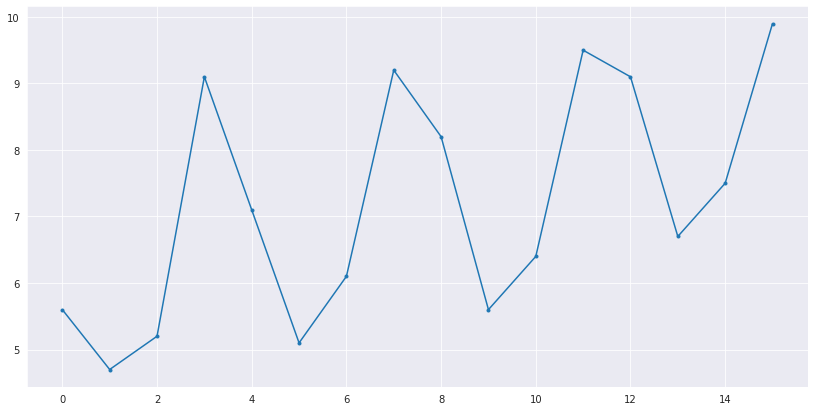

In [ ]:
plt.figure(figsize=(14,7)) # Создаем полотно размером 14 на 7
plt.plot(test_series, marker='.') # Выводим график созданного временного ряда
plt.show()

***Коэффициент автокорреляции***

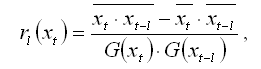

In [ ]:
Xt = test_series # Возмем пример временного ряда
Xt_1 = [0.0] + test_series[:-1] # Смещаем исходный временной ряд на один шаг
print('Исходный: ', Xt)
print('Со свигом:', Xt_1)

Исходный:  [5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5, 9.9]
Со свигом: [0.0, 5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5]


In [ ]:
Xt_np = np.array(Xt[1:]) # Убираем нулевой элемент и преобразуем в numpy-массив
Xt_1_np = np.array(Xt_1[1:]) # Убираем нулевой элемент и преобразуем в numpy-массив
print(Xt)
print(Xt_1)

[5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5, 9.9]
[0.0, 5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5]


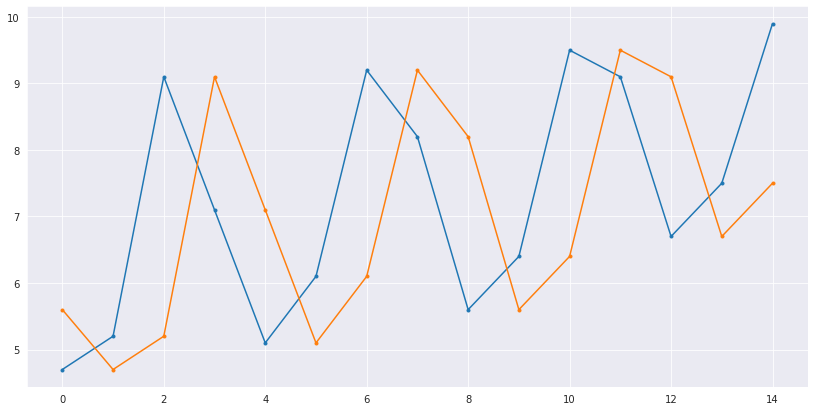

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(Xt_np, marker='.') # Выводим график первого временного ряда
plt.plot(Xt_1_np, marker='.') # Выводим график второго временного ряда
plt.show()

In [ ]:
m1 = (Xt_np*Xt_1_np).mean() # Считаем матожидание от произведения двух вр.рядов
m2 = Xt_np.mean() # Считаем мат.ожидание первого временного ряда
m3 = Xt_1_np.mean() # Считаем мат.ожидание второго временного ряда
s1 = Xt_np.std() # Считаем ср.кв.отклонение первого временного ряда
s2 = Xt_1_np.std() # Считаем ср.кв.отклонение второго временного ряда
k1 = (m1 - m2 * m3 ) / (s1 * s2) # Считаем коэф.автокорреляции при смещении на один шаг
print('Мат. ожидание произведения двух рядов:', round(m1,2)) 
print('Мат. ожилание первого ряда:', round(m2,2))
print('Мат. ожилание второго ряда:',round(m3,2))
print('std первого ряда:',round(s1,2))
print('std второго ряда:',round(s2,2))
print('Кф. автокорреляции при смещении на 1 шаг:',round(k1,4))

Мат. ожидание произведения двух рядов: 51.74
Мат. ожилание первого ряда: 7.29
Мат. ожилание второго ряда: 7.01
std первого ряда: 1.71
std второго ряда: 1.61
Кф. автокорреляции при смещении на 1 шаг: 0.2298


In [ ]:
def get_corr_koef(level, data):    
  Xt = data # Возмем пример временного ряда
  Xt_1 = [0.0] * level + data[:-level] # Сдигаем на level шагов
  Xt = np.array(Xt[level:]) # Отбрасываем первые level-элементов и преобразуем в numpy
  Xt_1 = np.array(Xt_1[level:]) # Отбрасываем первые level-элементов и преобразуем в numpy 
  m1 = (Xt*Xt_1).mean() # Считаем мат.ожидание от произведения двух временных рядов
  m2 = Xt.mean() # Считаем мат.ожидание первого временного ряда
  m3 = Xt_1.mean() # Считаем мат. ожидание второго временного ряда
  s1 = Xt.std() # Считаем ср.кв.отклонение первого временного ряда
  s2 = Xt_1.std() # Считаем ср.кв.отклонение второго временного ряда
  if s1!=0 and s2!=0:
    k1 = (m1 - m2 * m3 ) / (s1 * s2) # Считаем коэф.автокорреляции при смещении на level-шагов  
  else:
    k1=0
  return k1

In [ ]:
print(round(get_corr_koef(1, test_series),4)) 

0.2298


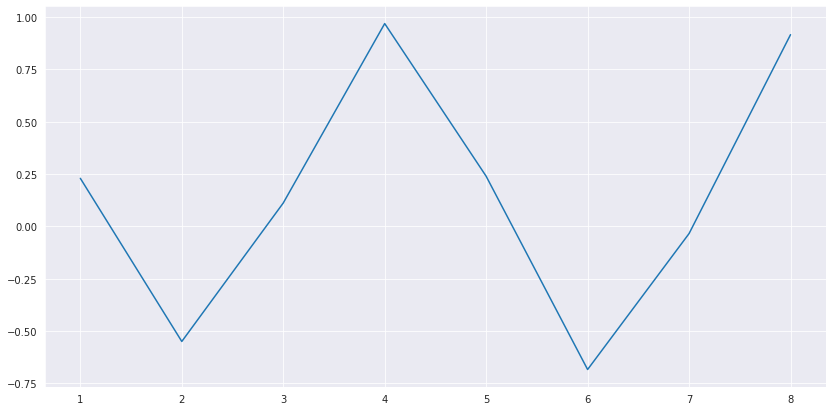

In [ ]:
x = np.arange(1,9) # Задаем последовательность шагов смещение от 1 до 9
y = [get_corr_koef(i, test_series) for i in x] # Посчитаем коэф. автокорреляции для каждого из заданных шагов
plt.figure(figsize=(14,7))
plt.plot(x, y) # Построим график коэф.автокорреляции
plt.show()

In [ ]:
level = 4 # Сдвиг между наблюдениями
Xt = test_series[level:] # Возмем пример временного ряда
Xt_1 = test_series[:-level] #  
print(Xt)
print(Xt_1)

[7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5, 9.9]
[5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5]


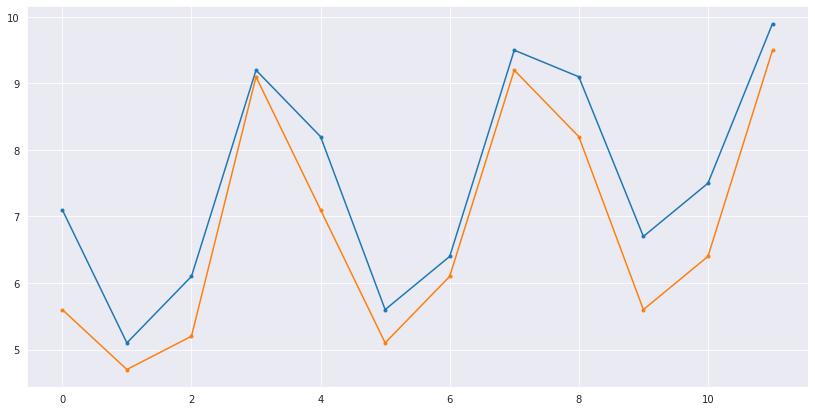

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(Xt, marker='.') # Выводим график первого временного ряда
plt.plot(Xt_1, marker='.') # Выводим график второго временного ряда
plt.show()

In [ ]:
level = 3 # Сдвиг между наблюдениями
Xt = test_series[level:] # Возмем пример временного ряда
Xt_1 = test_series[:-level] #  
print(Xt)
print(Xt_1)

[9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5, 9.9]
[5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1]


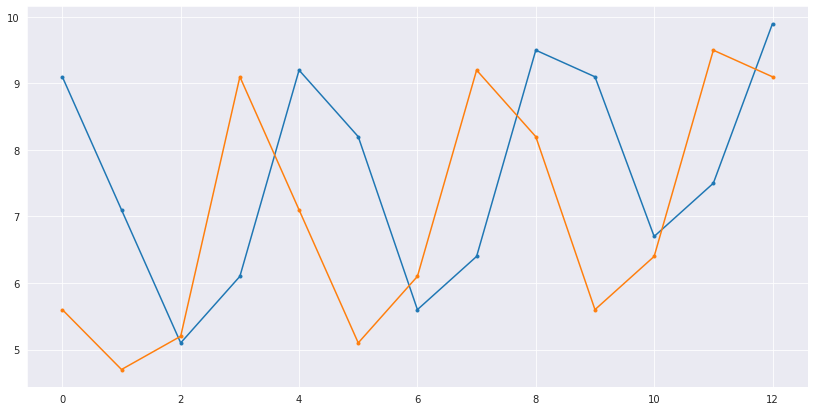

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(Xt, marker='.') # Выводим график первого временного ряда
plt.plot(Xt_1, marker='.') # Выводим график второго временного ряда
plt.show()

In [ ]:
level = 6 # Сдвиг между наблюдениями
Xt = test_series[level:] # Возмем пример временного ряда
Xt_1 = test_series[:-level] #  
print(Xt)
print(Xt_1)

[6.1, 9.2, 8.2, 5.6, 6.4, 9.5, 9.1, 6.7, 7.5, 9.9]
[5.6, 4.7, 5.2, 9.1, 7.1, 5.1, 6.1, 9.2, 8.2, 5.6]


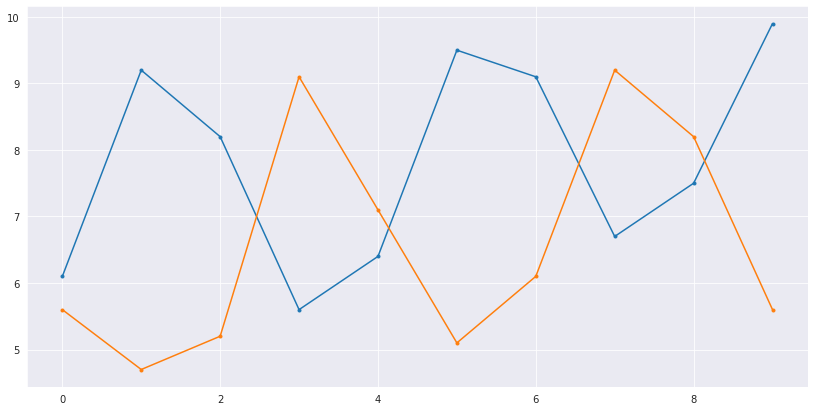

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(Xt, marker='.') # Выводим график первого временного ряда
plt.plot(Xt_1, marker='.') # Выводим график второго временного ряда
plt.show()

## Влияние тренда

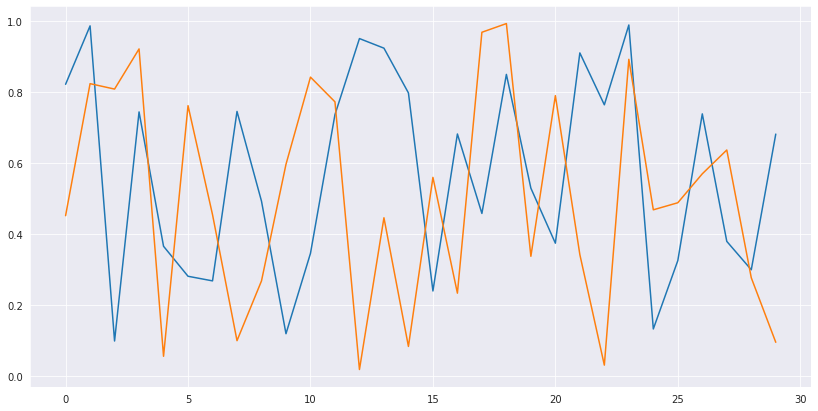

In [ ]:
x1 = np.random.rand(30) # Создадим массив из 30 случайных значений
x2 = np.random.rand(30) # Создадим массив из 30 случайных значений
plt.figure(figsize=(14,7))
plt.plot(x1) # Построим график первого массива
plt.plot(x2) # Построим график второго массива
plt.show()

In [ ]:
def get_corr(level, data1, data2):    
  Xt = data1 # Возмем пример временного ряда
  Xt_1 = data2 # Сдигаем на level шагов
  Xt = np.array(Xt[level:]) # Отбрасываем первые level-элементов и преобразуем в numpy
  Xt_1 = np.array(Xt_1[level:]) # Отбрасываем первые level-элементов и преобразуем в numpy 
  m1 = (Xt*Xt_1).mean() # Считаем мат.ожидание от произведения двух временных рядов
  m2 = Xt.mean() # Считаем мат.ожидание первого временного ряда
  m3 = Xt_1.mean() # Считаем мат. ожидание второго временного ряда
  s1 = Xt.std() # Считаем ср.кв.отклонение первого временного ряда
  s2 = Xt_1.std() # Считаем ср.кв.отклонение второго временного ряда
  if s1!=0 and s2!=0:
    k1 = (m1 - m2 * m3 ) / (s1 * s2) # Считаем коэф.автокорреляции при смещении на level-шагов  
  else:
    k1=0
  return k1

In [ ]:
get_corr(0, x1, x2)

-0.12702498068094953

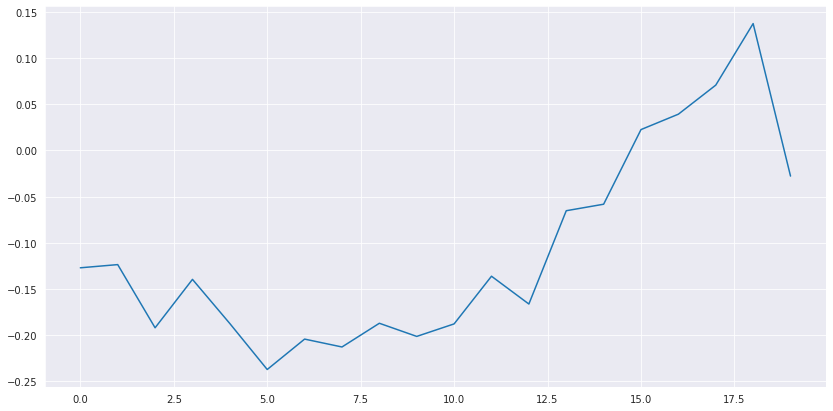

In [ ]:
x = np.arange(20) # Задаем последовательность шагов смещение от 1 до 9
y = [get_corr(i, x1, x2) for i in x] # Посчитаем коэф. автокорреляции для каждого из заданных шагов
plt.figure(figsize=(14,7))
plt.plot(x, y) # Построим график коэф.автокорреляции
plt.show()

In [ ]:
trend = np.linspace(0,5.5,x1.shape[0])
trend

array([0.        , 0.18965517, 0.37931034, 0.56896552, 0.75862069,
       0.94827586, 1.13793103, 1.32758621, 1.51724138, 1.70689655,
       1.89655172, 2.0862069 , 2.27586207, 2.46551724, 2.65517241,
       2.84482759, 3.03448276, 3.22413793, 3.4137931 , 3.60344828,
       3.79310345, 3.98275862, 4.17241379, 4.36206897, 4.55172414,
       4.74137931, 4.93103448, 5.12068966, 5.31034483, 5.5       ])

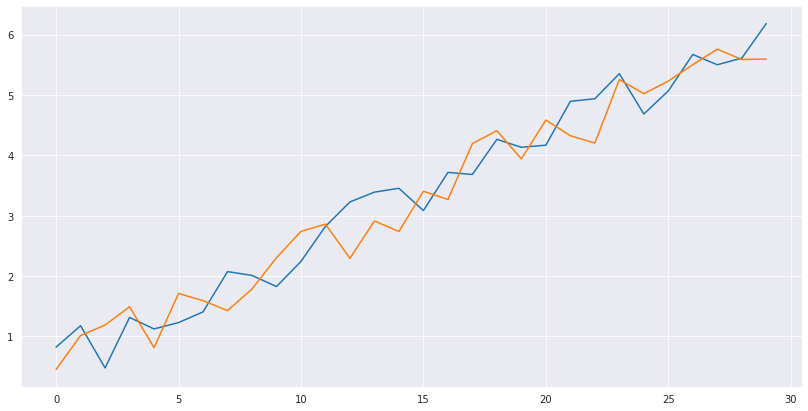

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(x1 + trend)
plt.plot(x2 + trend)
plt.show()

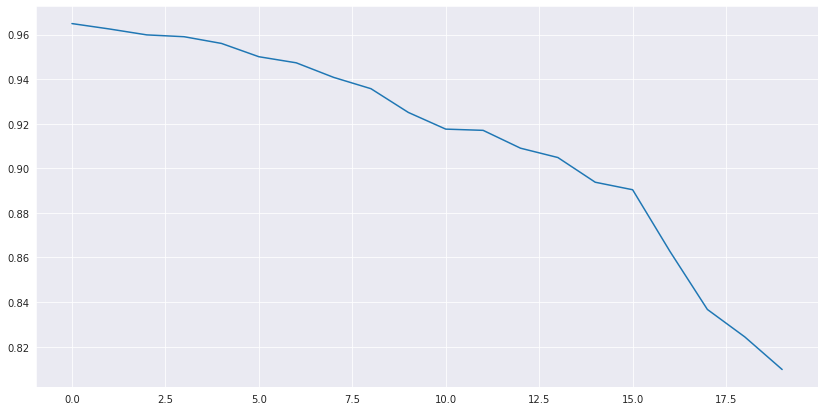

In [ ]:
x = np.arange(20) # Задаем последовательность шагов смещение от 1 до 9
y = [get_corr(i, x1+trend, x2+trend) for i in x] # Посчитаем коэф. автокорреляции для каждого из заданных шагов
plt.figure(figsize=(14,7))
plt.plot(x, y) # Построим график коэф.автокорреляции
plt.show()

## Дифференцирование данных

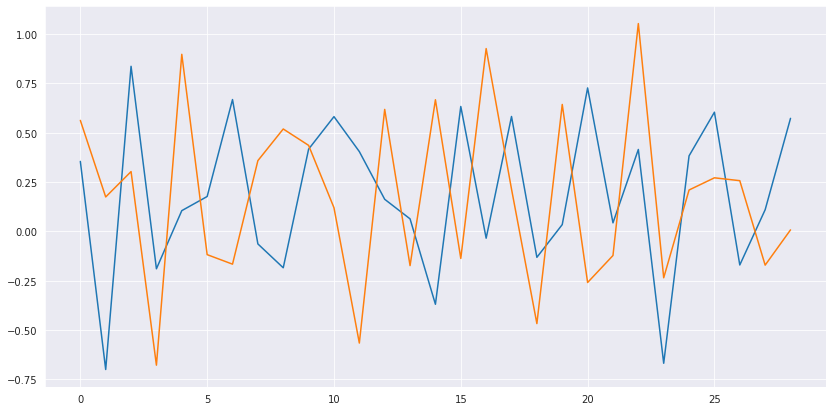

In [ ]:
x1_diff = np.diff(x1+trend) # Производим дифференцирование первого ряда
x2_diff = np.diff(x2+trend) # Производим дифференцирование второго ряда
plt.figure(figsize=(14,7))
plt.plot(x1_diff) # Отображаем первый график
plt.plot(x2_diff) # Отображаем второй график
plt.show()

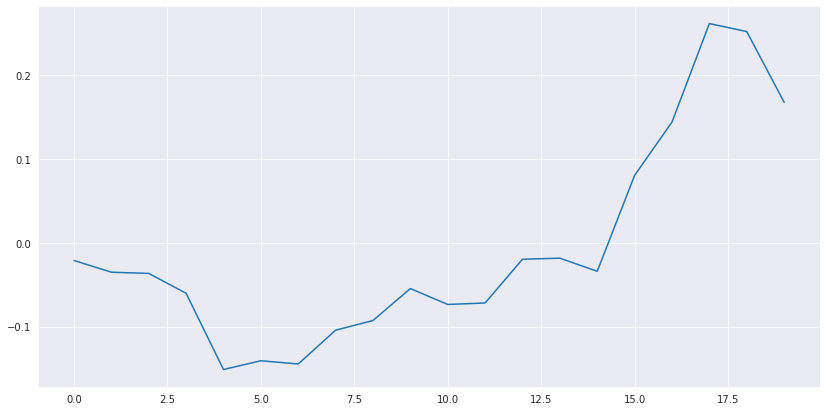

In [ ]:
x = np.arange(20) # Задаем последовательность шагов смещение от 1 до 9
y = [get_corr(i, x1_diff, x2_diff) for i in x] # Посчитаем коэф. автокорреляции для каждого из заданных шагов
plt.figure(figsize=(14,7))
plt.plot(x, y) # Построим график коэф.автокорреляции
plt.show()

#Прогнозирование акций Лукойл




In [ ]:
#Загружаем библиотеки

import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras import utils #Для to_categorical
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")
# Рисовать графики сразу же
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Считываем данные с помощью pandas
base_data = pd.read_csv('/content/drive/My Drive/Базы/акции лукойл/18_19.csv', sep=';')

In [ ]:
#Выводим пять первых строк
base_data.head()

,DATE,TIME,OPEN,MAX,MIN,CLOSE,VOLUME
0,03.01.2018,10:00:00,3341.0,3356.0,3340.0,3355.0,6088
1,03.01.2018,10:01:00,3355.0,3359.0,3353.0,3353.0,1624
2,03.01.2018,10:02:00,3351.5,3357.5,3351.5,3357.5,722
3,03.01.2018,10:03:00,3354.5,3360.0,3354.5,3358.0,3034
4,03.01.2018,10:04:00,3358.0,3360.0,3351.5,3360.0,1427


In [ ]:
base_data16 = pd.read_csv('/content/drive/My Drive/Базы/акции лукойл/16_17.csv', sep=';')
base_data18 = pd.read_csv('/content/drive/My Drive/Базы/акции лукойл/18_19.csv', sep=';')
data16_17 = base_data16.iloc[:,2:]
data18_19 = base_data18.iloc[:,2:]

In [ ]:
data16_17.shape[0]

263925

In [ ]:
# Выводим параметры одного файла
d = data18_19
print(len(d)) # Сколько есть записей
print(len(d.iloc[0])) # Длина одной строки данных
print(d.iloc[0]) # Пример первой строки данных

217947
5
OPEN      3341.0
MAX       3356.0
MIN       3340.0
CLOSE     3355.0
VOLUME    6088.0
Name: 0, dtype: float64


In [ ]:
# Объединяем базы из двух файлов
data = data16_17.copy()                 # Создаем копию первой базы
data = pd.concat([data16_17,data18_19]) # Присоединяем к ней вторую базу


In [ ]:
data_t = data.copy()
# попарные разности каналов
data_t['DifOMax']      = data_t.OPEN - data_t.MAX
data_t['DifOMin']      = data_t.OPEN - data_t.MIN
data_t['DifOC']        = data_t.OPEN - data_t.CLOSE
data_t['DifMAXMin']    = data_t.MAX - data_t.MIN
data_t['DifMAXC']      = data_t.MAX - data_t.CLOSE
data_t['DifMINC']      = data_t.MIN - data_t.CLOSE
# модули попарных разностей каналов
data_t['AbsDifOMax']   = abs(data_t.OPEN - data_t.MAX)
data_t['AbsDifOMin']   = abs(data_t.OPEN - data_t.MIN)
data_t['AbsDifOC']     = abs(data_t.OPEN - data_t.CLOSE)
data_t['AbsDifMAXMin'] = abs(data_t.MAX - data_t.MIN)
data_t['AbsDifMAXC']   = abs(data_t.MAX - data_t.CLOSE)
data_t['AbsDifMINC']   = abs(data_t.MIN - data_t.CLOSE)
# попарные произведения каналов
data_t['ProdOMax']     = data_t.OPEN * data_t.MAX
data_t['ProdOMin']     = data_t.OPEN * data_t.MIN
data_t['ProdOC']       = data_t.OPEN * data_t.CLOSE
data_t['ProdMAXMin']   = data_t.MAX * data_t.MIN
data_t['ProdMAXC']     = data_t.MAX * data_t.CLOSE
data_t['ProdMINC']     = data_t.MIN * data_t.CLOSE
# обратное значение каналов
data_t['RevO']         = 1/(data_t.OPEN + 0.001)
data_t['RevMax']       = 1/(data_t.MAX + 0.001)
data_t['RevMin']       = 1/(data_t.MIN + 0.001)
data_t['RevC']         = 1/(data_t.CLOSE + 0.001)
# первые производные и вторые производные
data_t['DerOpenPrev']      = [np.nan] + data_t.iloc[:-1]['OPEN'].tolist()
data_t['DerOpenPrevPrev']  = [np.nan] + data_t.iloc[:-1]['DerOpenPrev'].tolist()
data_t['DerOpen']          = data_t.OPEN - data_t.DerOpenPrev
data_t['Der2Open']         = data_t.OPEN - 2*data_t.DerOpenPrev + data_t.DerOpenPrevPrev
data_t['DerOpen'][0]       = 0.0
data_t['Der2Open'][0]      = 0.0
data_t['Der2Open'][1]      = 0.0
data_t.drop(['DerOpenPrev', 'DerOpenPrevPrev'], axis=1, inplace=True )
data_t['DerMaxPrev']       = [np.nan] + data_t.iloc[:-1]['MAX'].tolist()
data_t['DerMaxPrevPrev']   = [np.nan] + data_t.iloc[:-1]['DerMaxPrev'].tolist()
data_t['DerMax']           = data_t.MAX - data_t.DerMaxPrev
data_t['Der2Max']          = data_t.MAX - 2*data_t.DerMaxPrev + data_t.DerMaxPrevPrev
data_t['DerMax'][0]        = 0.0
data_t['Der2Max'][0]       = 0.0
data_t['Der2Max'][1]       = 0.0
data_t.drop(['DerMaxPrev', 'DerMaxPrevPrev'], axis=1, inplace=True )
data_t['DerMinPrev']       = [np.nan] + data_t.iloc[:-1]['MIN'].tolist()
data_t['DerMinPrevPrev']   = [np.nan] + data_t.iloc[:-1]['DerMinPrev'].tolist()
data_t['DerMin']           = data_t.MIN - data_t.DerMinPrev
data_t['Der2Min']          = data_t.MIN - 2*data_t.DerMinPrev + data_t.DerMinPrevPrev
data_t['DerMin'][0]        = 0.0
data_t['Der2Min'][0]       = 0.0
data_t['Der2Min'][1]       = 0.0
data_t.drop(['DerMinPrev', 'DerMinPrevPrev'], axis=1, inplace=True )
data_t['DerClosePrev']     = [np.nan] + data_t.iloc[:-1]['CLOSE'].tolist()
data_t['DerClosePrevPrev'] = [np.nan] + data_t.iloc[:-1]['DerClosePrev'].tolist()
data_t['DerC']             = data_t.CLOSE - data_t.DerClosePrev
data_t['Der2C']            = data_t.CLOSE - 2*data_t.DerClosePrev + data_t.DerClosePrevPrev
data_t['DerC'][0]          = 0.0
data_t['Der2C'][0]         = 0.0
data_t['Der2C'][1]         = 0.0
data_t.drop(['DerClosePrev', 'DerClosePrevPrev'], axis=1, inplace=True )


In [ ]:
data_t

,OPEN,MAX,MIN,CLOSE,VOLUME,DifOMax,DifOMin,DifOC,DifMAXMin,DifMAXC,DifMINC,AbsDifOMax,AbsDifOMin,AbsDifOC,AbsDifMAXMin,AbsDifMAXC,AbsDifMINC,ProdOMax,ProdOMin,ProdOC,ProdMAXMin,ProdMAXC,ProdMINC,RevO,RevMax,RevMin,RevC,DerOpen,Der2Open,DerMax,Der2Max,DerMin,Der2Min,DerC,Der2C
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,1.0,1.0,5.8,5.8,0.0,4.8,1.0,1.0,5.8,5.8,0.0,5538485.80,5524850.00,5524850.00,5536130.00,5536130.00,5522500.00,0.000425,0.000424,0.000426,0.000426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2352.9,2355.7,2350.0,2355.7,195,-2.8,2.9,-2.8,5.7,0.0,-5.7,2.8,2.9,2.8,5.7,0.0,5.7,5542726.53,5529315.00,5542726.53,5535895.00,5549322.49,5535895.00,0.000425,0.000425,0.000426,0.000425,1.9,0.0,-0.1,0.0,0.0,0.0,5.7,0.0
2,2355.6,2356.0,2351.4,2354.1,257,-0.4,4.2,1.5,4.6,1.9,-2.7,0.4,4.2,1.5,4.6,1.9,2.7,5549793.60,5538957.84,5545317.96,5539898.40,5546259.60,5535430.74,0.000425,0.000424,0.000425,0.000425,2.7,0.8,0.3,0.4,1.4,1.4,-1.6,-7.3
3,2354.5,2355.0,2351.2,2353.7,763,-0.5,3.3,0.8,3.8,1.3,-2.5,0.5,3.3,0.8,3.8,1.3,2.5,5544847.50,5535900.40,5541786.65,5537076.00,5542963.50,5534019.44,0.000425,0.000425,0.000425,0.000425,-1.1,-3.8,-1.0,-1.3,-0.2,-1.6,-0.4,1.2
4,2353.1,2353.9,2353.1,2353.6,231,-0.8,0.0,-0.5,0.8,0.3,-0.5,0.8,0.0,0.5,0.8,0.3,0.5,5538962.09,5537079.61,5538256.16,5538962.09,5540139.04,5538256.16,0.000425,0.000425,0.000425,0.000425,-1.4,-0.3,-1.1,-0.1,1.9,2.1,-0.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217942,5183.5,5183.5,5183.5,5183.5,31523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,0.000193,0.000193,0.000193,0.000193,13.5,13.5,11.5,11.5,16.0,18.0,11.5,10.0
217943,5183.5,5183.5,5183.5,5183.5,5090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,0.000193,0.000193,0.000193,0.000193,0.0,-13.5,0.0,-11.5,0.0,-16.0,0.0,-11.5
217944,5183.5,5183.5,5183.5,5183.5,230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,0.000193,0.000193,0.000193,0.000193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217945,5183.5,5183.5,5183.5,5183.5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,0.000193,0.000193,0.000193,0.000193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(data_t['OPEN'])

481872

In [ ]:
data   = np.array(data)                   # Превращаем в numpy массив
data_t = np.array(data_t)                 # Превращаем в numpy массив

In [ ]:
print(data_t.shape)


(481872, 35)


In [ ]:
# Сравниваем размеры
print(len(data16_17)) # Выводим размер первой базы
print(len(data18_19)) # Выводим размер второй базы
print(len(data))      # Выводим размер суммарной базы

263925
217947
481872


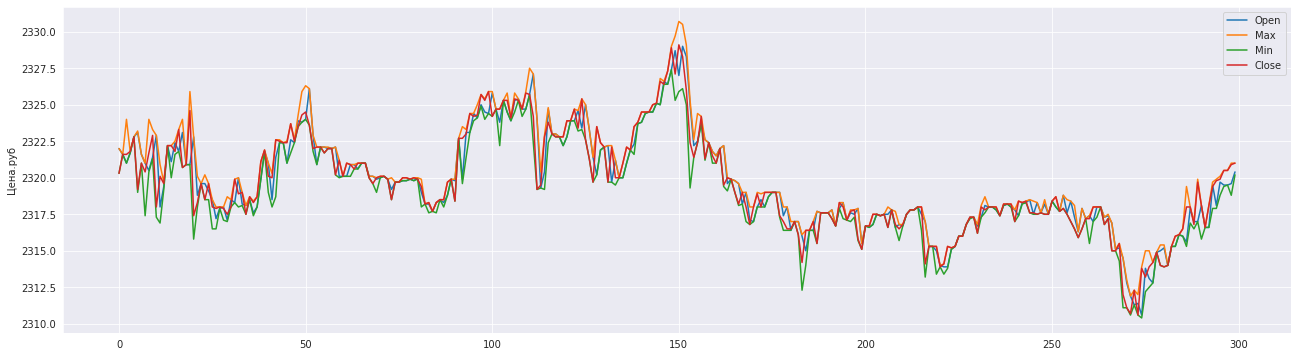

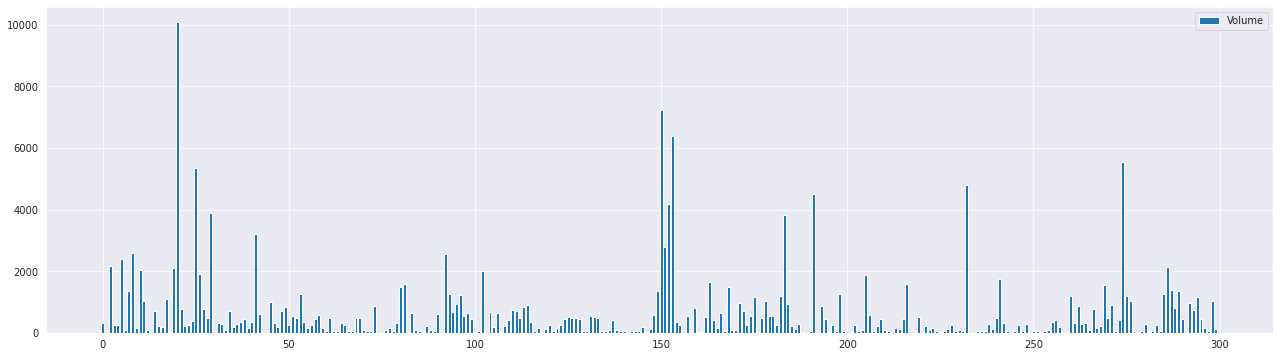

In [ ]:
#Отображаем исходные от точки start и длинной stop
start = 100            #С какой точки начинаем
#stop = data.shape[0] #Сколько точек отрисуем
length = 300 #Сколько точек отрисуем

#Заполняем текстовые названия каналов данных
chanelNames = ['Open', 'Max', 'Min', 'Close', 'Volume']

#Рисуем все графики данных
#ЧЕтыре основных канала - open, max, min, close
plt.figure(figsize=(22,6))
for i in range(4):
  #Отрисовываем часть данных
  #От начальной точки, до начальной точки + размер шага отрисовки
  plt.plot(data[start:start+length,i], 
          label=chanelNames[i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#Канал volume
plt.figure(figsize=(22,6))
plt.bar(x=np.arange(length), height=data[start:start+length,4], label="Volume")
plt.legend()
plt.show()

### Использование TimeseriesGenerator

In [ ]:
import numpy as np # Подключаем numpy
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Подлкючаем модуль TimeseriesGenerator

In [ ]:
test_array = np.arange(50) # Создаем тестовый массив из полседовательности чисел от 0 до 50
print(test_array) # Выводим на экран созданный массив

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [ ]:
x_train = test_array # Создаем x_train
y_train = test_array # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=5
    )

In [ ]:
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]
y_train: [10 11 12 13 14]

Батч № 1
x_train: [[ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]]
y_train: [15 16 17 18 19]

Батч № 2
x_train: [[10 11 12 13 14 15 16 17 18 19]
 [11 12 13 14 15 16 17 18 19 20]
 [12 13 14 15 16 17 18 19 20 21]
 [13 14 15 16 17 18 19 20 21 22]
 [14 15 16 17 18 19 20 21 22 23]]
y_train: [20 21 22 23 24]

Батч № 3
x_train: [[15 16 17 18 19 20 21 22 23 24]
 [16 17 18 19 20 21 22 23 24 25]
 [17 18 19 20 21 22 23 24 25 26]
 [18 19 20 21 22 23 24 25 26 27]
 [19 20 21 22 23 24 25 26 27 28]]
y_train: [25 26 27 28 29]

Батч № 4
x_train: [[20 21 22 23 24 25 26 27 28 29]
 [21 22 23 24 25 26 27 28 29 30]
 [22 23 24 25 26 27 28 29 30 31]
 [23 24 25 26 27 28 29 30 31 32]
 [24 2

In [ ]:
x_train = test_array[:-1] # Создаем x_train
y_train = test_array[1:] # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=1
    )
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[0 1 2 3 4 5 6 7 8 9]]
y_train: [11]

Батч № 1
x_train: [[ 1  2  3  4  5  6  7  8  9 10]]
y_train: [12]

Батч № 2
x_train: [[ 2  3  4  5  6  7  8  9 10 11]]
y_train: [13]

Батч № 3
x_train: [[ 3  4  5  6  7  8  9 10 11 12]]
y_train: [14]

Батч № 4
x_train: [[ 4  5  6  7  8  9 10 11 12 13]]
y_train: [15]

Батч № 5
x_train: [[ 5  6  7  8  9 10 11 12 13 14]]
y_train: [16]

Батч № 6
x_train: [[ 6  7  8  9 10 11 12 13 14 15]]
y_train: [17]

Батч № 7
x_train: [[ 7  8  9 10 11 12 13 14 15 16]]
y_train: [18]

Батч № 8
x_train: [[ 8  9 10 11 12 13 14 15 16 17]]
y_train: [19]

Батч № 9
x_train: [[ 9 10 11 12 13 14 15 16 17 18]]
y_train: [20]

Батч № 10
x_train: [[10 11 12 13 14 15 16 17 18 19]]
y_train: [21]

Батч № 11
x_train: [[11 12 13 14 15 16 17 18 19 20]]
y_train: [22]

Батч № 12
x_train: [[12 13 14 15 16 17 18 19 20 21]]
y_train: [23]

Батч № 13
x_train: [[13 14 15 16 17 18 19 20 21 22]]
y_train: [24]

Батч № 14
x_train: [[14 15 16 17 18 19 20 21 22 23]]
y_train: [25]



In [ ]:
x_train = test_array # Создаем x_train
y_train = [[x, x+1] for x in range(50)] # Создаем y_train

# Создаем генератор
gen = TimeseriesGenerator(
    x_train,
    y_train,
    length= 10,
    sampling_rate=1,
    stride=1,
    batch_size=1
    )
# Формируем цикл for для прохождения по элементам генератора
for i, g in enumerate(gen):
  print('Батч №', i)
  print('x_train:', g[0])
  print('y_train:', g[1])
  print()

Батч № 0
x_train: [[0 1 2 3 4 5 6 7 8 9]]
y_train: [[10 11]]

Батч № 1
x_train: [[ 1  2  3  4  5  6  7  8  9 10]]
y_train: [[11 12]]

Батч № 2
x_train: [[ 2  3  4  5  6  7  8  9 10 11]]
y_train: [[12 13]]

Батч № 3
x_train: [[ 3  4  5  6  7  8  9 10 11 12]]
y_train: [[13 14]]

Батч № 4
x_train: [[ 4  5  6  7  8  9 10 11 12 13]]
y_train: [[14 15]]

Батч № 5
x_train: [[ 5  6  7  8  9 10 11 12 13 14]]
y_train: [[15 16]]

Батч № 6
x_train: [[ 6  7  8  9 10 11 12 13 14 15]]
y_train: [[16 17]]

Батч № 7
x_train: [[ 7  8  9 10 11 12 13 14 15 16]]
y_train: [[17 18]]

Батч № 8
x_train: [[ 8  9 10 11 12 13 14 15 16 17]]
y_train: [[18 19]]

Батч № 9
x_train: [[ 9 10 11 12 13 14 15 16 17 18]]
y_train: [[19 20]]

Батч № 10
x_train: [[10 11 12 13 14 15 16 17 18 19]]
y_train: [[20 21]]

Батч № 11
x_train: [[11 12 13 14 15 16 17 18 19 20]]
y_train: [[21 22]]

Батч № 12
x_train: [[12 13 14 15 16 17 18 19 20 21]]
y_train: [[22 23]]

Батч № 13
x_train: [[13 14 15 16 17 18 19 20 21 22]]
y_train: [[23 24]]

In [ ]:
y_train = [[x, x+1] for x in range(50)]
print(y_train)

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [39, 40], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [47, 48], [48, 49], [49, 50]]


### Функция загрузки данных




In [ ]:
#Формируем параметры загрузки данных

xLen = 100 #300                      #Анализируем по 100 прошедшим точкам 
valLen = 30000                  #Используем 30.000 записей для проверки

trainLen = data_t.shape[0]-valLen # Размер тренировочной выборки

#Делим данные на тренировочную и тестовую выборки 
xTrain, xTest = data_t[:trainLen], data_t[trainLen+xLen+2:]

#Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

#Делаем reshape,т.к. у нас только один столбец по одному значению
yTrain, yTest = np.reshape(data_t[:trainLen,3],(-1,1)), np.reshape(data_t[trainLen+xLen+2:,3],(-1,1)) 
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

#Создаем генератор для обучения
trainDataGen = TimeseriesGenerator(xTrain, yTrain,           #В качестве параметров наши выборки
                               length=xLen, stride=1, sampling_rate=1, #Для каждой точки (из промежутка длины xLen)
                               batch_size=20)                #Размер batch, который будем скармливать модели

#Создаем аналогичный генератор для валидации при обучении
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, stride=1,
                               batch_size=20)

In [ ]:
print(data_t[:trainLen])


[[ 2.3510e+03  2.3558e+03  2.3500e+03 ...  0.0000e+00  0.0000e+00
   0.0000e+00]
 [ 2.3529e+03  2.3557e+03  2.3500e+03 ...  0.0000e+00  5.7000e+00
   0.0000e+00]
 [ 2.3556e+03  2.3560e+03  2.3514e+03 ...  1.4000e+00 -1.6000e+00
  -7.3000e+00]
 ...
 [ 5.1860e+03  5.1885e+03  5.1840e+03 ... -1.0000e+00 -5.0000e-01
   2.0000e+00]
 [ 5.1850e+03  5.1870e+03  5.1850e+03 ...  2.5000e+00  2.0000e+00
   2.5000e+00]
 [ 5.1875e+03  5.1895e+03  5.1875e+03 ...  1.5000e+00  2.5000e+00
   5.0000e-01]]


In [ ]:
print(trainDataGen[0][0].shape,
      trainDataGen[0][1].shape)

(20, 100, 35) (20, 1)


## Полносвязная сеть




## Визуализация результатов


In [ ]:
# Функция рассчитываем результаты прогнозирования сети
# В аргументы принимает сеть (currModel) и проверочную выборку
# Выдаёт результаты предсказания predVal
# И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  # Предсказываем ответ сети по проверочной выборке
  # И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  return (predVal, yValUnscaled)

# Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
# start - точка с которой начинаем отрисовку графика
# step - длина графика, которую отрисовываем
# channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()
  
# Функция расчёта корреляции двух одномерных векторов
def correlate(a, b):
  # Рассчитываем основные показатели
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  
  #Рассчитываем корреляцию
  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

# Функция рисуем корреляцию прогнозированного сигнала с правильным
# Смещая на различное количество шагов назад
# Для проверки появления эффекта автокорреляции
# channels - по каким каналам отображать корреляцию
# corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смещении на i рагов обратно
    yLen = yValUnscaled.shape[0] # Запоминаем размер проверочной выборки

      # Постепенно увеличиваем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = [] # Создаём пустой лист, в нём будут корреляции при смещении на i шагов обратно

      # Постепенно увеличиваем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [ ]:
#Создадим генератор проверочной выборки, из которой потом вытащим xVal, yVal для проверки
DataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, sampling_rate=1,
                               batch_size=len(xTest)) #размер batch будет равен длине нашей выборки
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

## Dense-сетка

### Эксп. №1

In [ ]:
#Создаём нейронку
modelD = Sequential()
modelD.add(Dense(150,input_shape = (xLen,35), activation="relu" )) # 35 - количество каналов
modelD.add(Flatten())
modelD.add(Dense(1, activation="linear"))

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100, 150)          5400      
_________________________________________________________________
flatten_1 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15001     
Total params: 20,401
Trainable params: 20,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs= 50,
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
22589/22589 [==============================] - 63s 3ms/step - loss: 3.2062e-04 - val_loss: 1.6138e-04
Epoch 2/50
22589/22589 [==============================] - 60s 3ms/step - loss: 2.9579e-05 - val_loss: 2.4222e-05
Epoch 3/50
22589/22589 [==============================] - 59s 3ms/step - loss: 1.7468e-05 - val_loss: 3.1659e-06
Epoch 4/50
22589/22589 [==============================] - 59s 3ms/step - loss: 1.4360e-05 - val_loss: 6.6317e-06
Epoch 5/50
22589/22589 [==============================] - 60s 3ms/step - loss: 1.2578e-05 - val_loss: 2.1718e-05
Epoch 6/50
22589/22589 [==============================] - 59s 3ms/step - loss: 9.4261e-06 - val_loss: 8.7018e-06
Epoch 7/50
22589/22589 [==============================] - 59s 3ms/step - loss: 8.3171e-06 - val_loss: 2.8331e-06
Epoch 8/50
22589/22589 [==============================] - 59s 3ms/step - loss: 7.5250e-06 - val_loss: 5.7197e-06
Epoch 9/50
22589/22589 [==============================] - 58s 3ms/step - loss: 7.5484e-06 - val_

In [ ]:
#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-5))
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50,
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
22589/22589 [==============================] - 57s 3ms/step - loss: 5.9665e-07 - val_loss: 8.1603e-07
Epoch 2/50
22589/22589 [==============================] - 57s 3ms/step - loss: 5.8187e-07 - val_loss: 8.1191e-07
Epoch 3/50
22589/22589 [==============================] - 57s 3ms/step - loss: 5.7864e-07 - val_loss: 7.3426e-07
Epoch 4/50
22589/22589 [==============================] - 56s 2ms/step - loss: 5.7094e-07 - val_loss: 7.1182e-07
Epoch 5/50
22589/22589 [==============================] - 57s 3ms/step - loss: 5.7056e-07 - val_loss: 1.1897e-06
Epoch 6/50
22589/22589 [==============================] - 56s 2ms/step - loss: 5.6720e-07 - val_loss: 8.2393e-07
Epoch 7/50
22589/22589 [==============================] - 56s 2ms/step - loss: 5.6070e-07 - val_loss: 7.6045e-07
Epoch 8/50
22589/22589 [==============================] - 57s 3ms/step - loss: 5.6444e-07 - val_loss: 7.9110e-07
Epoch 9/50
22589/22589 [==============================] - 56s 2ms/step - loss: 5.5952e-07 - val_

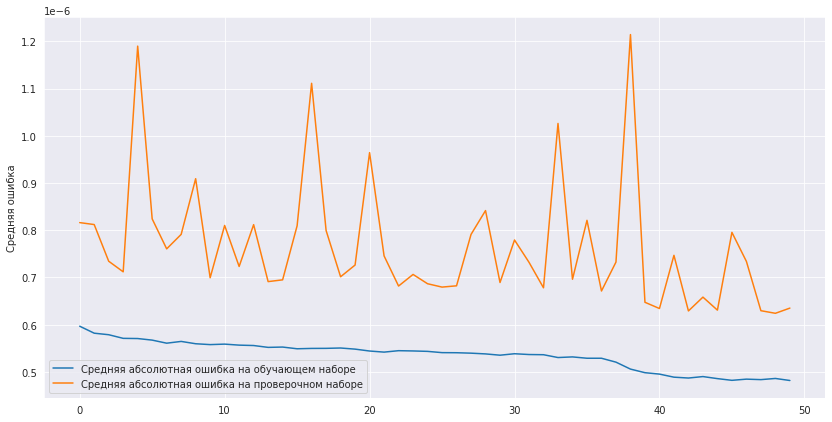

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-6))
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50 ,
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
22589/22589 [==============================] - 57s 2ms/step - loss: 4.2870e-07 - val_loss: 6.2298e-07
Epoch 2/50
22589/22589 [==============================] - 56s 2ms/step - loss: 4.2804e-07 - val_loss: 6.2649e-07
Epoch 3/50
22589/22589 [==============================] - 56s 2ms/step - loss: 4.2757e-07 - val_loss: 6.3116e-07
Epoch 4/50
22589/22589 [==============================] - 57s 3ms/step - loss: 4.2738e-07 - val_loss: 6.2313e-07
Epoch 5/50
22589/22589 [==============================] - 56s 2ms/step - loss: 4.2688e-07 - val_loss: 6.2412e-07
Epoch 6/50
22589/22589 [==============================] - 57s 3ms/step - loss: 4.2681e-07 - val_loss: 6.3847e-07
Epoch 7/50
22589/22589 [==============================] - 56s 2ms/step - loss: 4.2690e-07 - val_loss: 6.2414e-07
Epoch 8/50
22589/22589 [==============================] - 56s 2ms/step - loss: 4.2685e-07 - val_loss: 6.2584e-07
Epoch 9/50
22589/22589 [==============================] - 57s 3ms/step - loss: 4.2669e-07 - val_

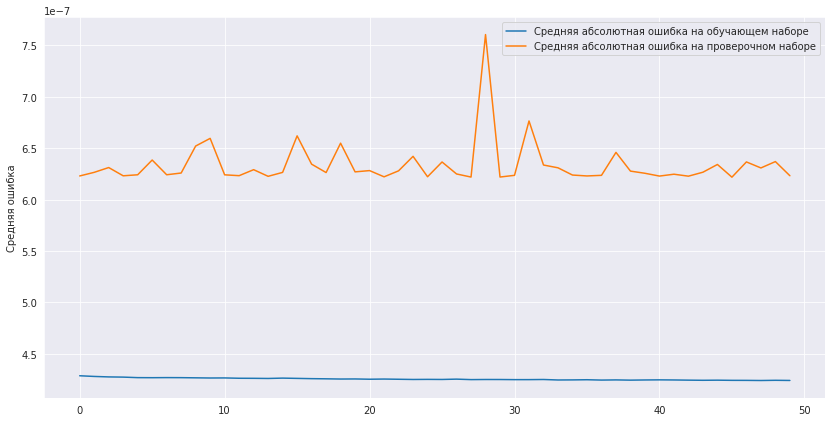

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

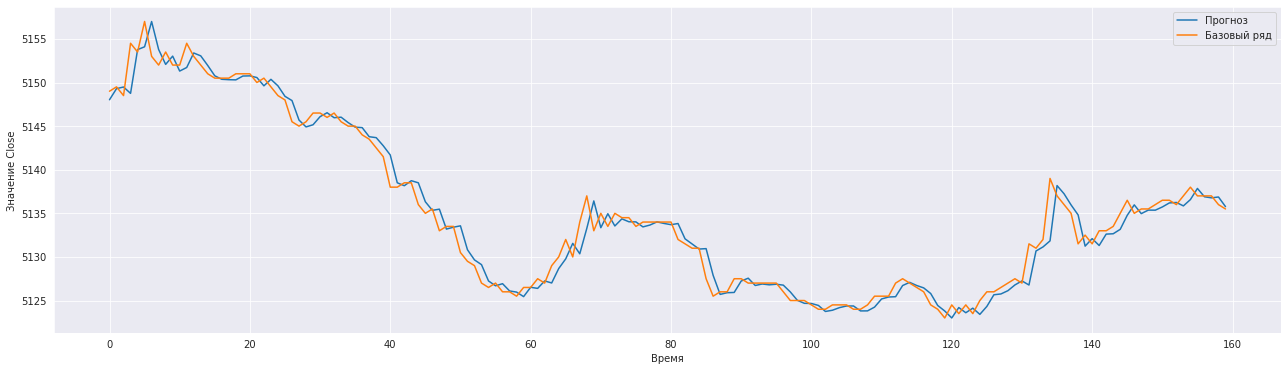

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


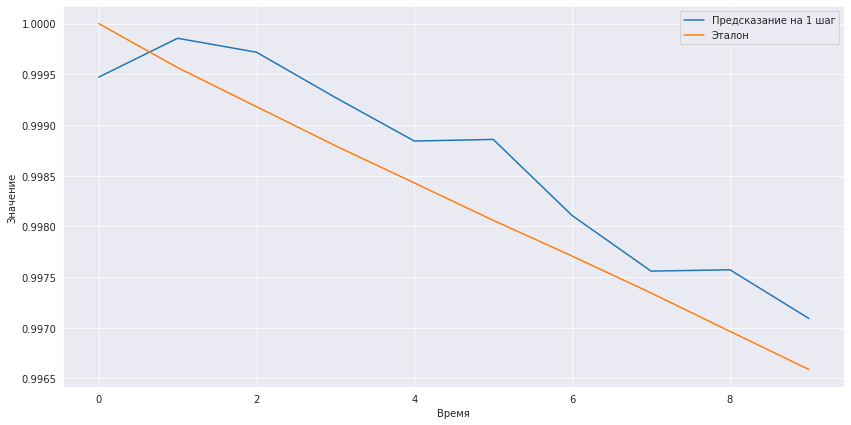

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину шагов
showCorr([0], 10, predVal, yValUnscaled)

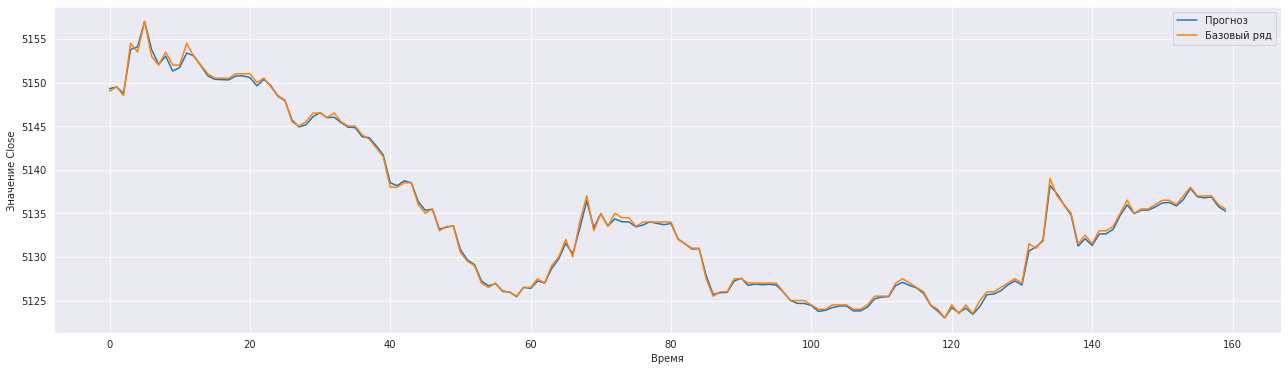

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])


### Эксп. №2

In [ ]:
#Создаём нейронку
modelD_2 = Sequential()
modelD_2.add(Flatten(input_shape = (xLen,35))) # 35 - количество каналов
modelD_2.add(Dense(150, activation="relu" )) 
modelD_2.add(Dense(1, activation="linear"))

#Компилируем
modelD_2.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3500)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               525150    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151       
Total params: 525,301
Trainable params: 525,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Запускаем обучение
history = modelD_2.fit(
                    trainDataGen, 
                    epochs=20 ,
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/20
22589/22589 [==============================] - 52s 2ms/step - loss: 0.0038 - val_loss: 3.0162e-04
Epoch 2/20
22589/22589 [==============================] - 51s 2ms/step - loss: 1.7436e-04 - val_loss: 1.7587e-04
Epoch 3/20
22589/22589 [==============================] - 51s 2ms/step - loss: 4.5044e-05 - val_loss: 1.0284e-04
Epoch 4/20
22589/22589 [==============================] - 51s 2ms/step - loss: 3.0986e-05 - val_loss: 6.0695e-06
Epoch 5/20
22589/22589 [==============================] - 51s 2ms/step - loss: 1.9758e-05 - val_loss: 5.2374e-06
Epoch 6/20
22589/22589 [==============================] - 52s 2ms/step - loss: 1.5855e-05 - val_loss: 8.3525e-06
Epoch 7/20
22589/22589 [==============================] - 51s 2ms/step - loss: 1.3072e-05 - val_loss: 4.6793e-06
Epoch 8/20
22589/22589 [==============================] - 51s 2ms/step - loss: 1.1144e-05 - val_loss: 4.7966e-06
Epoch 9/20
22589/22589 [==============================] - 51s 2ms/step - loss: 9.8218e-06 - val_loss

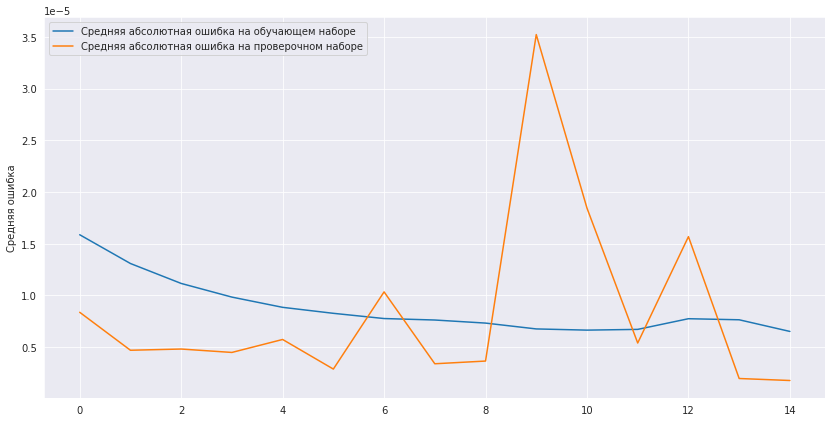

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][5:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][5:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

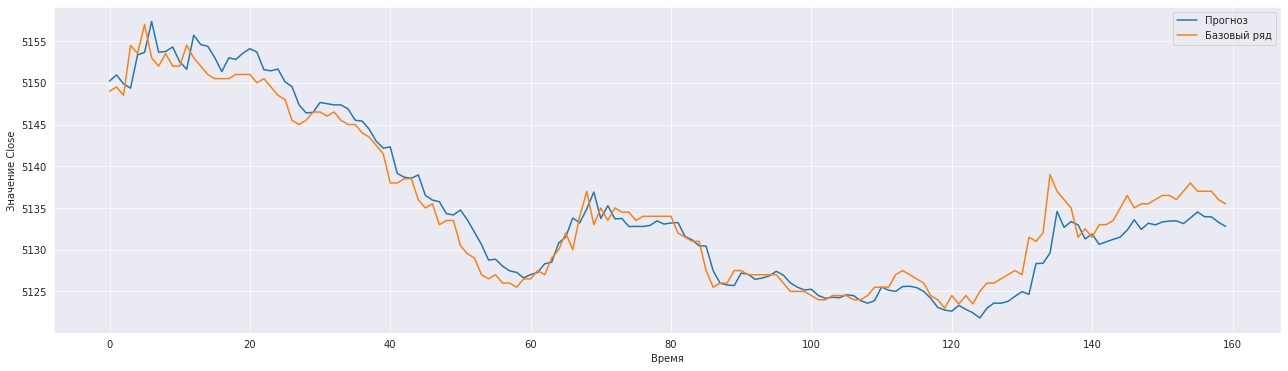

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelD_2, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


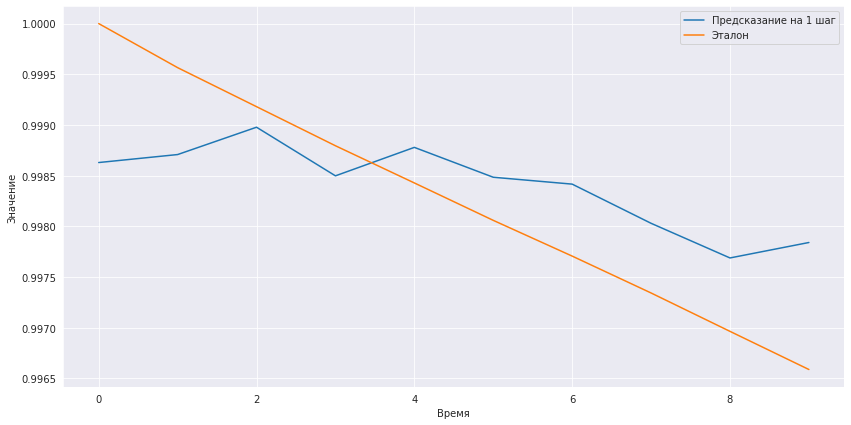

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину шагов
showCorr([0], 10, predVal, yValUnscaled)

In [ ]:
modelD_2.compile(loss="mse", optimizer=Adam(lr=1e-5))
#Запускаем обучение
history = modelD_2.fit(
                    trainDataGen, 
                    epochs=20,
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/20
22589/22589 [==============================] - 50s 2ms/step - loss: 2.0709e-06 - val_loss: 2.8007e-06
Epoch 2/20
22589/22589 [==============================] - 50s 2ms/step - loss: 1.9453e-06 - val_loss: 1.9436e-06
Epoch 3/20
22589/22589 [==============================] - 51s 2ms/step - loss: 1.8480e-06 - val_loss: 2.0783e-06
Epoch 4/20
22589/22589 [==============================] - 50s 2ms/step - loss: 1.7507e-06 - val_loss: 1.5888e-06
Epoch 5/20
22589/22589 [==============================] - 50s 2ms/step - loss: 1.6813e-06 - val_loss: 2.5223e-06
Epoch 6/20
22589/22589 [==============================] - 50s 2ms/step - loss: 1.6031e-06 - val_loss: 1.6310e-06
Epoch 7/20
22589/22589 [==============================] - 50s 2ms/step - loss: 1.5312e-06 - val_loss: 1.5484e-06
Epoch 8/20
22589/22589 [==============================] - 50s 2ms/step - loss: 1.4823e-06 - val_loss: 1.6683e-06
Epoch 9/20
22589/22589 [==============================] - 50s 2ms/step - loss: 1.4316e-06 - val_

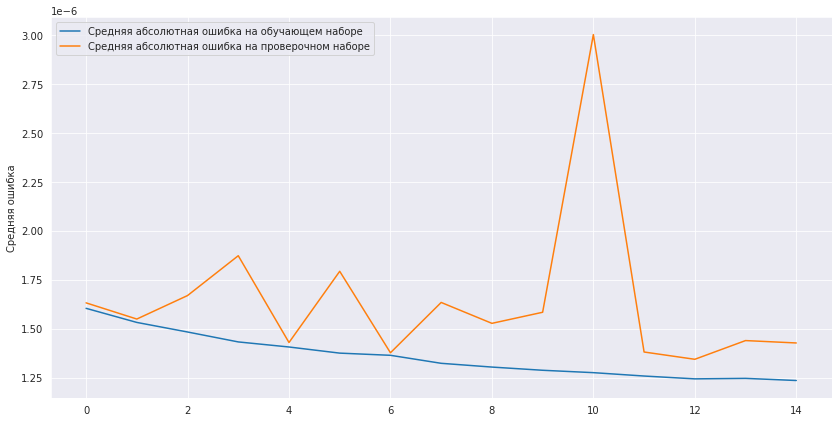

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][5:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][5:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

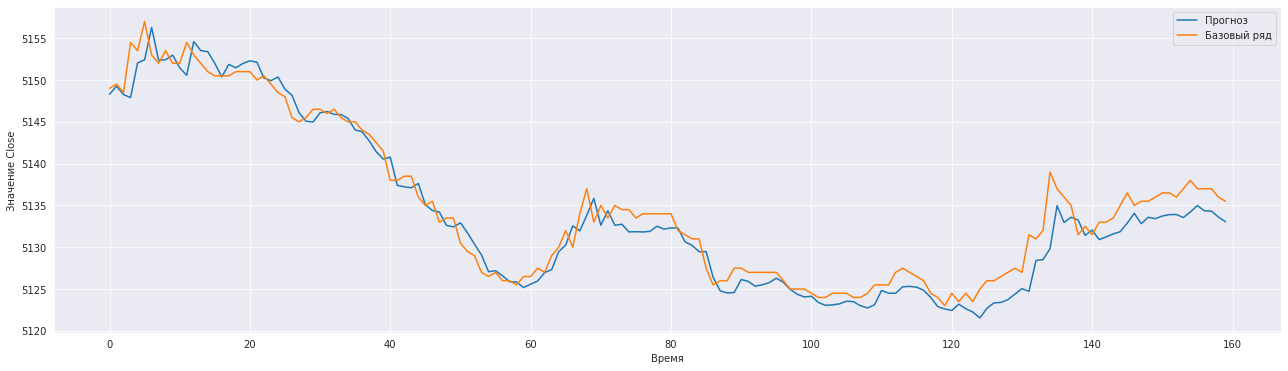

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelD_2, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)


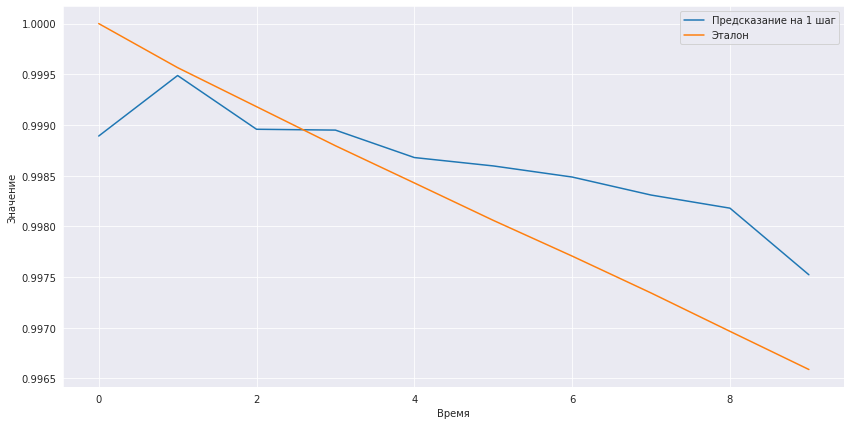

In [ ]:
#Отображаем корреляцию
#Используем выходной канал - только open
#Проверяем корреляцию на глубину  шагов
showCorr([0], 10, predVal, yValUnscaled)

## Одномерная свёртка



In [ ]:
modelC = Sequential()

modelC.add(Conv1D(64, 5, input_shape = (xLen,35), activation="relu"))
modelC.add(Conv1D(64, 5, activation="relu"))
modelC.add(MaxPooling1D())
modelC.add(Flatten())
modelC.add(Dense(100, activation="relu"))
modelC.add(Dense(1, activation="linear"))

modelC.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelC.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 96, 64)            11264     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 64)            20544     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 46, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2944)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               294500    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 326,409
Trainable params: 326,409
Non-trainable params: 0
__________________________________________________

In [ ]:
history = modelC.fit(trainDataGen,
                    epochs=50,
                    verbose=1,
                    validation_data=testDataGen)

Epoch 1/50
22589/22589 [==============================] - 101s 3ms/step - loss: 2.4374e-04 - val_loss: 4.0166e-05
Epoch 2/50
22589/22589 [==============================] - 70s 3ms/step - loss: 4.7016e-05 - val_loss: 7.3669e-06
Epoch 3/50
22589/22589 [==============================] - 70s 3ms/step - loss: 3.1125e-05 - val_loss: 5.4331e-05
Epoch 4/50
22589/22589 [==============================] - 70s 3ms/step - loss: 2.7748e-05 - val_loss: 3.4983e-05
Epoch 5/50
22589/22589 [==============================] - 70s 3ms/step - loss: 2.1750e-05 - val_loss: 9.4187e-06
Epoch 6/50
22589/22589 [==============================] - 70s 3ms/step - loss: 1.8083e-05 - val_loss: 4.5004e-06
Epoch 7/50
22589/22589 [==============================] - 70s 3ms/step - loss: 1.6955e-05 - val_loss: 1.1685e-05
Epoch 8/50
22589/22589 [==============================] - 70s 3ms/step - loss: 1.5458e-05 - val_loss: 6.5978e-06
Epoch 9/50
22589/22589 [==============================] - 70s 3ms/step - loss: 1.5003e-05 - val

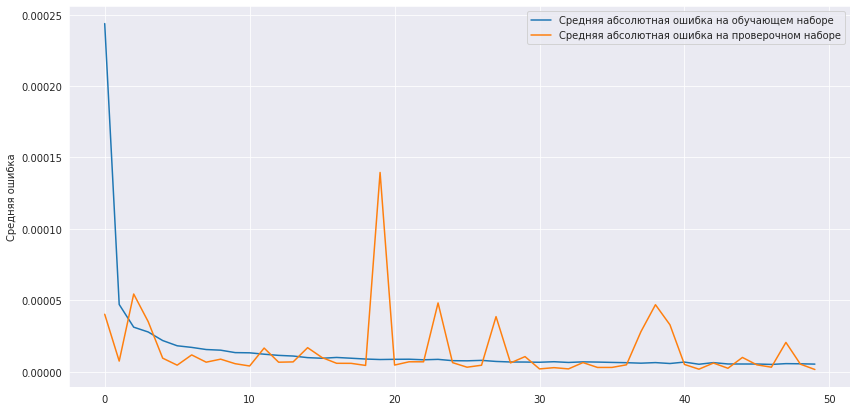

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)

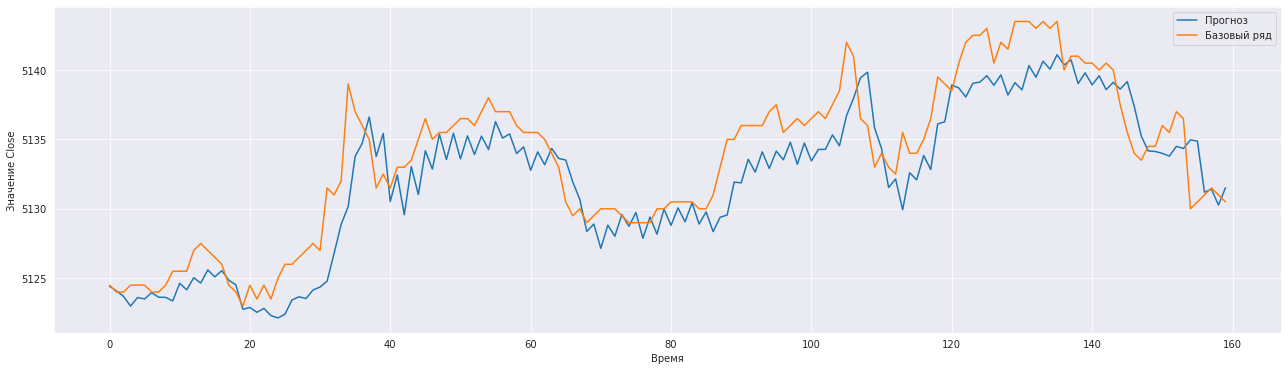

In [ ]:
#Отображаем графики
showPredict(100, 160, 0, predVal, yValUnscaled)

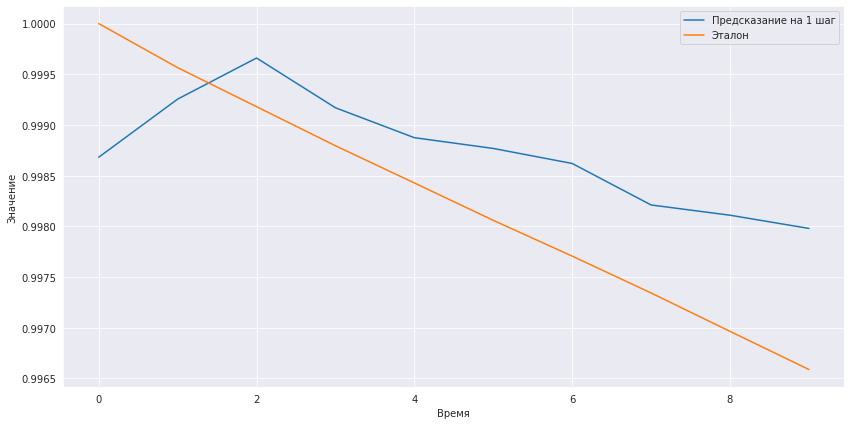

In [ ]:
#Отображаем корреляцию
showCorr([0], 10, predVal, yValUnscaled)

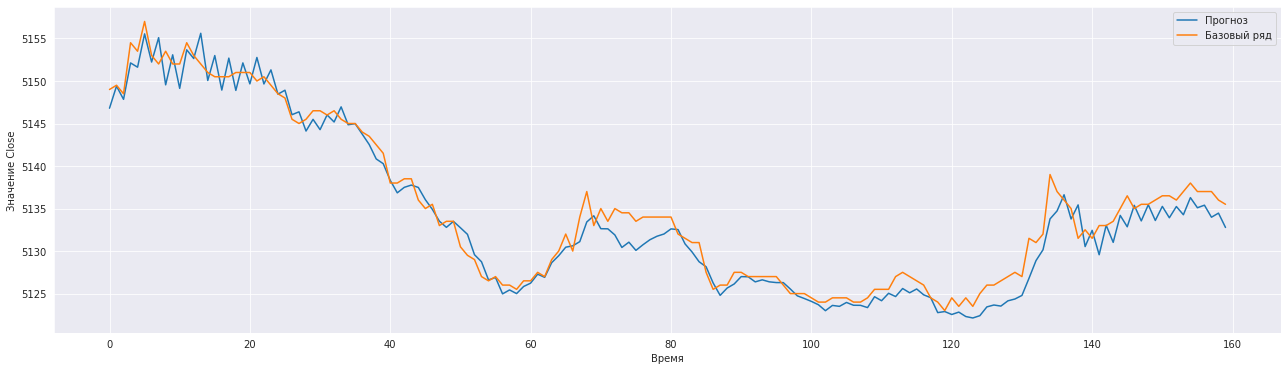

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])


In [ ]:
modelC.compile(loss="mse", optimizer=Adam(lr=1e-5))
history = modelC.fit(trainDataGen,
                    epochs=20,
                    verbose=1,
                    validation_data=testDataGen)

Epoch 1/20
22589/22589 [==============================] - 69s 3ms/step - loss: 1.3322e-06 - val_loss: 1.6744e-06
Epoch 2/20
22589/22589 [==============================] - 70s 3ms/step - loss: 1.3141e-06 - val_loss: 1.4002e-06
Epoch 3/20
22589/22589 [==============================] - 70s 3ms/step - loss: 1.2985e-06 - val_loss: 1.4155e-06
Epoch 4/20
22589/22589 [==============================] - 68s 3ms/step - loss: 1.2781e-06 - val_loss: 1.4735e-06
Epoch 5/20
22589/22589 [==============================] - 67s 3ms/step - loss: 1.2577e-06 - val_loss: 1.5938e-06
Epoch 6/20
22589/22589 [==============================] - 67s 3ms/step - loss: 1.2554e-06 - val_loss: 1.9495e-06
Epoch 7/20
22589/22589 [==============================] - 67s 3ms/step - loss: 1.2356e-06 - val_loss: 1.6651e-06
Epoch 8/20
22589/22589 [==============================] - 67s 3ms/step - loss: 1.2327e-06 - val_loss: 2.2711e-06
Epoch 9/20
22589/22589 [==============================] - 67s 3ms/step - loss: 1.2275e-06 - val_

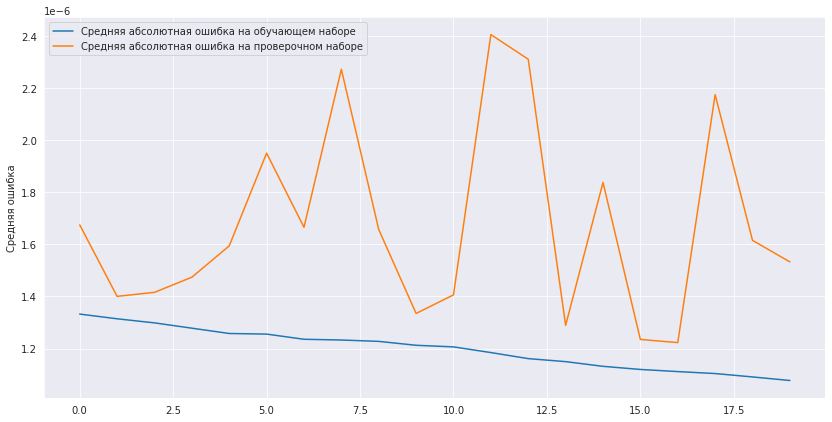

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

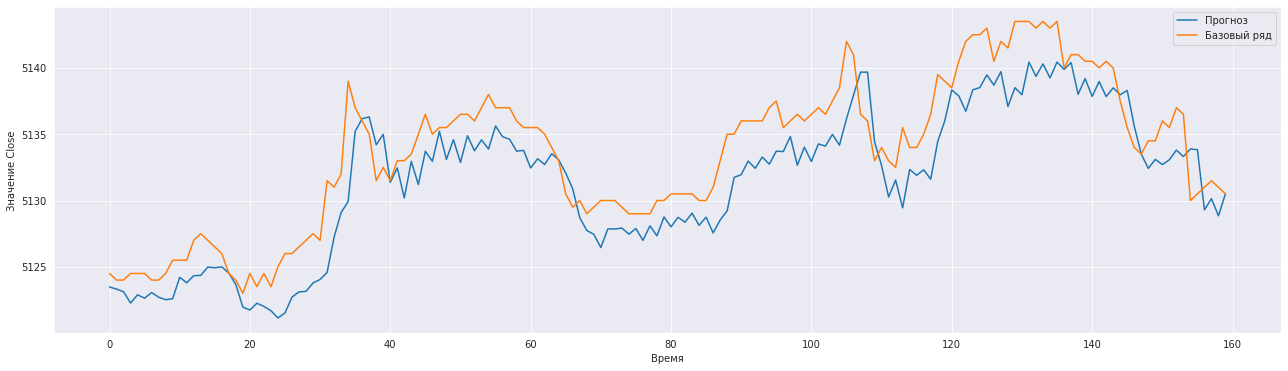

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)
#Отображаем графики
showPredict(100, 160, 0, predVal, yValUnscaled)

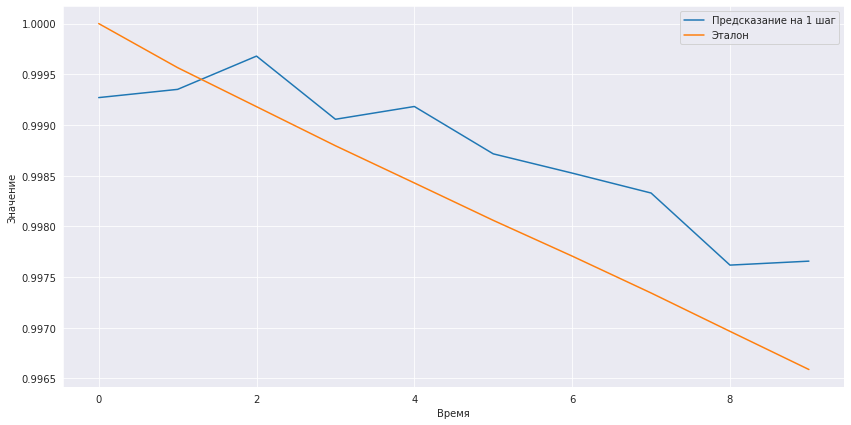

In [ ]:
#Отображаем корреляцию
showCorr([0], 10, predVal, yValUnscaled)

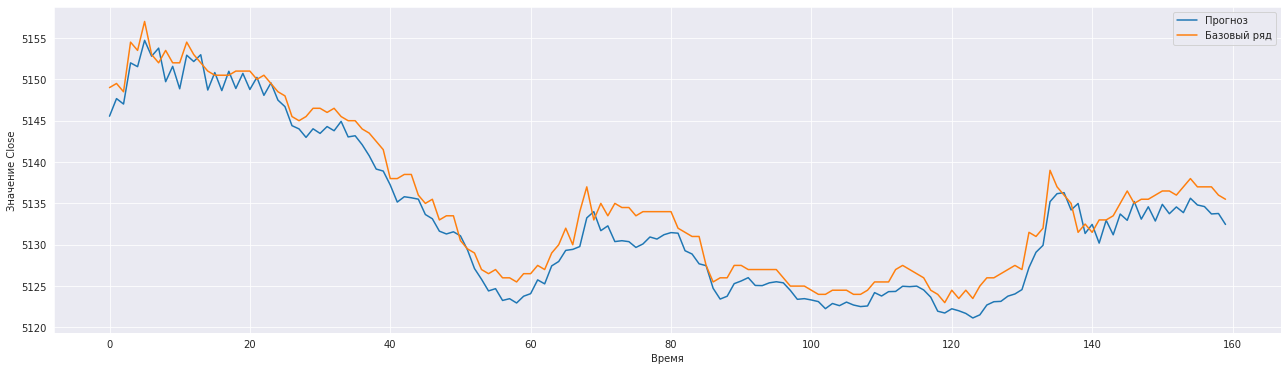

In [ ]:
#Прогнозируем данные текущей сетью
currModel = modelC #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])


## LSTM


In [ ]:
import tensorflow
modelL = Sequential()
modelL.add(LSTM(5, input_shape = (xLen, 35)))
modelL.add(Dense(10, activation="relu"))
modelL.add(Dense(1, activation="linear"))

modelL.compile(loss="mse", optimizer=Adam(lr=1e-5))

modelL.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 820       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelL.fit(trainDataGen, 
                    epochs=20,
                    verbose=1,
                    validation_data=testDataGen)

Epoch 1/20
22589/22589 [==============================] - 131s 6ms/step - loss: 0.0262 - val_loss: 1.8657e-04
Epoch 2/20
22589/22589 [==============================] - 128s 6ms/step - loss: 3.3550e-04 - val_loss: 1.2191e-04
Epoch 3/20
22589/22589 [==============================] - 128s 6ms/step - loss: 3.0787e-05 - val_loss: 1.3118e-05
Epoch 4/20
22589/22589 [==============================] - 129s 6ms/step - loss: 6.0700e-06 - val_loss: 7.9848e-06
Epoch 5/20
22589/22589 [==============================] - 128s 6ms/step - loss: 3.1544e-06 - val_loss: 5.6484e-06
Epoch 6/20
22589/22589 [==============================] - 128s 6ms/step - loss: 2.2742e-06 - val_loss: 5.7076e-06
Epoch 7/20
22589/22589 [==============================] - 130s 6ms/step - loss: 1.8281e-06 - val_loss: 3.5495e-06
Epoch 8/20
22589/22589 [==============================] - 129s 6ms/step - loss: 1.5806e-06 - val_loss: 2.7437e-06
Epoch 9/20
22589/22589 [==============================] - 130s 6ms/step - loss: 1.4042e-06 -

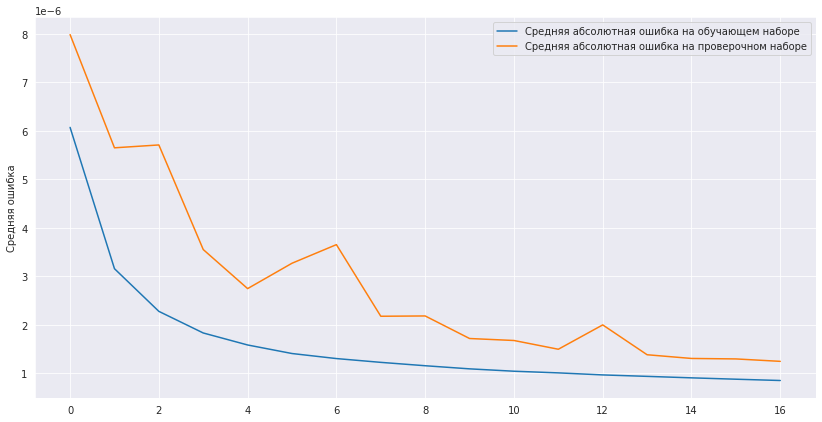

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][3:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][3:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelL, xVal[0], yVal[0], yScaler)

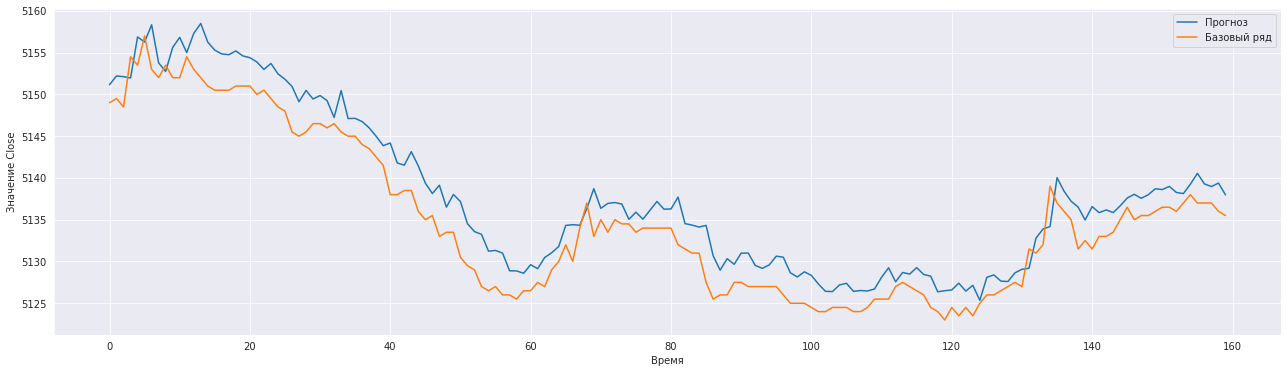

In [ ]:
#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)

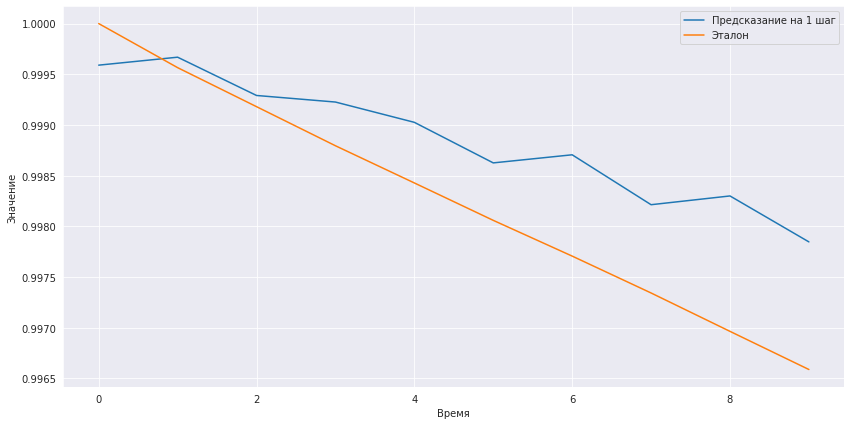

In [ ]:
#Отображаем корреляцию
showCorr([0], 10, predVal, yValUnscaled)

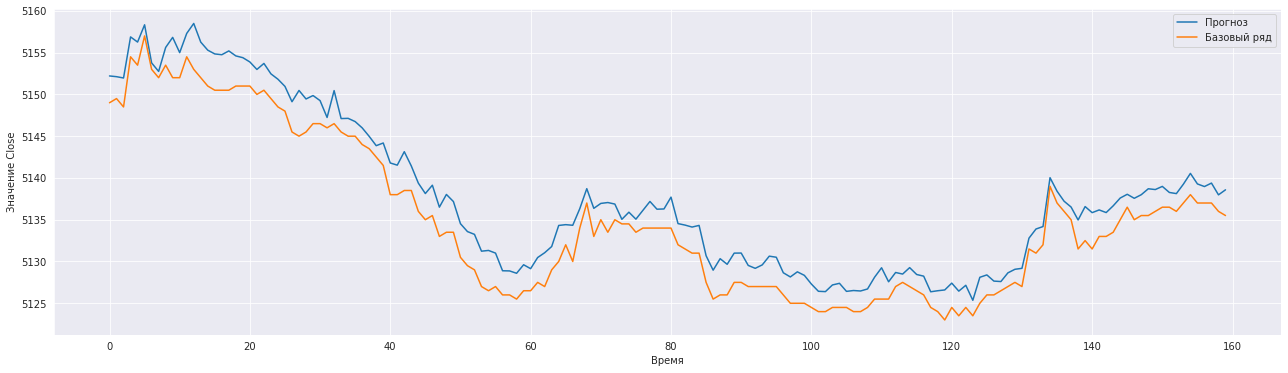

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelL, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal[1:], yValUnscaled[:-1])